# Hypothesis Testing - Part 4. ANOVA

This notebook is from a series on Hypothesis Testing
1. Hypothesis Testing - ANOVA
2. Hypothesis Testing - ANOVA
3. Hypothesis Testing - Chi Sq
4. **Hypothesis Testing - ANOVA**

Here we will explore one ANOVA on the wine data set. This notebook will go through the following:
1. ANOVA using Stats Models
2. ANOVA using Scipy Stats
3. Post Hoc Testing to determine which groups are dis similar
4. Above techniques on an alternative field
5. ANOVA by hand - Useful to understand the math and theory behind ANOVA

The following Resources have been used:  
https://www.pythonfordatascience.org/anova-python/#anova_scipy_stats  
https://towardsdatascience.com/1-way-anova-from-scratch-dissecting-the-anova-table-with-a-worked-example-170f4f2e58ad

#### Libraries

In [292]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import datasets
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Import the data 

In [293]:
# load the data 
data = datasets.load_wine(return_X_y=False, )

In [294]:
#Category Function to convert from a numeric

def cat_convert(target):
    if target == 0:
        return 'A'
    elif target == 1:
        return 'B'
    elif target == 2:
        return 'C'
    else:
        return '99'

In [295]:
# Convert to a dataframe and add category column
wine = pd.DataFrame(data.data, columns=data.feature_names)
wine['target'] = data.target
wine['category'] = wine['target'].apply(cat_convert)

In [348]:
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,category
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,A
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,A
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,A
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,A
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,A


#### Check the summary stats

In [349]:
wine.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [298]:
wine['category'].value_counts()

B    71
A    59
C    48
Name: category, dtype: int64

In [299]:
wine.groupby('category')['alcohol'].mean()

category
A    13.744746
B    12.278732
C    13.153750
Name: alcohol, dtype: float64

## 1. ANOVA using Stats Models
#### This method conducts a one-way ANOVA in two steps:

1. Fit the model using an estimation method,
The default estimation method in most statistical software packages is ordinary least squares
2.
Pass fitted model into ANOVA method to produce ANOVA table

In [300]:
# Just keep alchol and class columns
wine_alcohol = wine[['category','alcohol']].copy()

#### Fit a linear model using stats models

In [327]:
lm = ols('alcohol ~ category', data=wine_alcohol).fit()
anova_table = sm.stats.anova_lm(lm)
display(anova_table)
print("Degrees of Freedom Explained {}".format(lm.df_model))
print("Degrees of Freedom Residual {}".format(lm.df_resid))

,df,sum_sq,mean_sq,F,PR(>F)
category,2.0,70.794850,35.397425,135.077624,3.319504e-36
Residual,175.0,45.859182,0.262052,NaN,NaN


Degrees of Freedom Explained 2.0
Degrees of Freedom Residual 175.0


The F statistic is high  resulting in a very small p value so there is a probable difference between the groups  
**Category sum_sq:**  This is Sum of squares explained. This is the  weighted sum of the squared differences between each group means and the overall mean  
**Residual sum_sq:**  This is the sum of Squares Residual -  Each values diffence from the group mean  
**Sum of Squares Total:** The sum of the squared differences between the original scores and the overall mean (Category sum_sq + Sum of Squares Total)  
**Mean Squares Explained:** = Sum Sq explained/ degrees of freedom explained (ngroups -1)  
**Mean Squares Residual:** = Sum Sq Residual/ degrees of freedom Residual (nobs - ngroups) 
**F Statistic:** Mean Squares Explained / Mean Squares Residual  ( Difference between groups/ difference within groups)



## 2. ANOVA using Scipy Stats
#### Conducting an one-way ANOVA using scipy.stats is quick and only returns the restuling F-statistic and p-value of the test.

In [302]:
stat, p = stats.f_oneway(wine_alcohol.query('category == "A"')['alcohol'], 
                         wine_alcohol.query('category == "B"')['alcohol'], 
                         wine_alcohol.query('category == "C"')['alcohol'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=135.078, p=0.000
Probably different distributions


## 3. POST-HOC TESTING
Conducting post-hoc tests or planned comparisons it allows one to see which group(s) significantly differ from each other;

#### 3.1 TUKEY HONESTLY SIGNIFICANT DIFFERENCE (HSD)

In [303]:
import statsmodels.api as sm
import statsmodels.stats.multicomp

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
mc = statsmodels.stats.multicomp.MultiComparison(wine_alcohol['alcohol'],wine_alcohol['category'])
mc_results = mc.tukeyhsd() # can change the alpha rate here 
mc_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,-1.466,0.001,-1.6792,-1.2528,True
A,C,-0.591,0.001,-0.8262,-0.3558,True
B,C,0.875,0.001,0.6489,1.1012,True


**p-adj** is the corrected p-value which takes into account the multiple comparisons being conducted  
**lower** is the lower band of the confidence interval. In the current example the confidence interval at the 95% level since = 0.05.  
**upper** is the upper band of the confidence interval. In the current example the confidence interval at the 95% level since = 0.05.  
**Reject** is the decision rule based on the corrected p-value  

#### Plot the differences

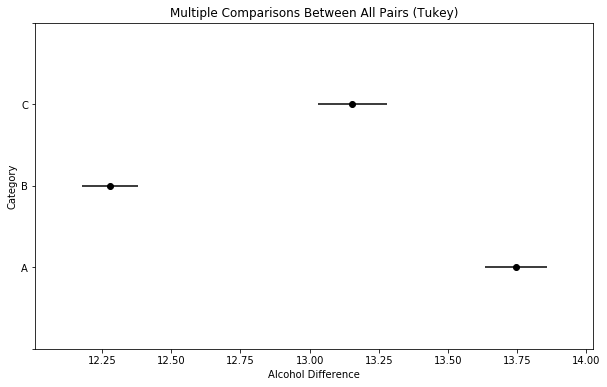

In [304]:
fig = mc_results.plot_simultaneous(ylabel= "Category", xlabel= "Alcohol Difference")

#### 3.2 Bonferroni Correction
Bonferroni correction is α/n

In [305]:
import statsmodels.stats.multicomp as mc
comp = mc.MultiComparison(wine_alcohol['alcohol'], wine_alcohol['category'])
tbl, a1, a2 = comp.allpairtest(stats.ttest_ind, method= "bonf")

tbl

group1,group2,stat,pval,pval_corr,reject
A,B,16.4786,0.0,0.0,True
A,C,6.1575,0.0,0.0,True
B,C,-8.7547,0.0,0.0,True


## 4. Quick check on another field to illustrate not dissimmilar groups

,df,sum_sq,mean_sq,F,PR(>F)
category,2.0,4.962020,2.481010,101.316795,5.917662e-30
Residual,175.0,4.285338,0.024488,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
A,B,-0.0058,0.9,-0.0709,0.0594,False
A,C,-0.3793,0.001,-0.4512,-0.3074,True
B,C,-0.3736,0.001,-0.4427,-0.3044,True


group1,group2,stat,pval,pval_corr,reject
A,B,0.1928,0.8474,1.0,False
A,C,16.8853,0.0,0.0,True
B,C,11.5614,0.0,0.0,True


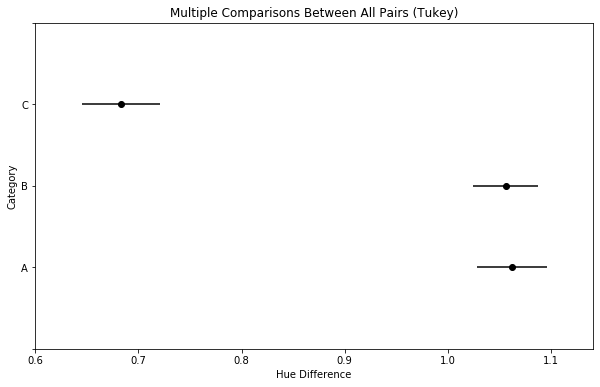

In [306]:
# Hue vs Category
# Fir the Anova Model
lm = ols('hue ~ category', data=wine).fit()
anova_table = sm.stats.anova_lm(lm)
display(anova_table)

# Tukey
mc = statsmodels.stats.multicomp.MultiComparison(wine['hue'],wine['category'])
mc_results = mc.tukeyhsd() # can change the alpha rate here 
display(mc_results.summary())

#Bonferroni
comp = statsmodels.stats.multicomp.MultiComparison(wine['hue'], wine['category'])
tbl, a1, a2 = comp.allpairtest(stats.ttest_ind, method= "bonf")
display(tbl)

fig = mc_results.plot_simultaneous( ylabel= "Category", xlabel= "Hue Difference")

## 5.ANOVA From Scratch

Here we will perform all the calculations by hand to illustrate how the f statistic was reached for alcohol vs category

In [307]:
# compute overall mean
overall_mean = wine_alcohol['alcohol'].mean()
overall_mean

13.00061797752809

In [308]:
# compute Sum of Squares Total
wine_alcohol['overall_mean'] = overall_mean
ss_total = sum((wine_alcohol['alcohol'] - wine_alcohol['overall_mean'])**2)
ss_total

116.65403202247192

In [309]:
# compute group means
group_means = wine_alcohol.groupby('category').mean()
group_means = group_means.rename(columns = {'alcohol': 'group_mean'})
group_means

,group_mean,overall_mean
category,,
A,13.744746,13.000618
B,12.278732,13.000618
C,13.153750,13.000618


In [311]:
# add group means and overall mean to the original data frame
wine_alcohol = wine_alcohol.merge(group_means[['group_mean']], left_on = 'category', right_index = True)


In [312]:
wine_alcohol

,category,alcohol,overall_mean,group_mean
0,A,14.23,13.000618,13.744746
1,A,13.20,13.000618,13.744746
2,A,13.16,13.000618,13.744746
3,A,14.37,13.000618,13.744746
4,A,13.24,13.000618,13.744746
...,...,...,...,...
173,C,13.71,13.000618,13.153750
174,C,13.40,13.000618,13.153750
175,C,13.27,13.000618,13.153750
176,C,13.17,13.000618,13.153750


In [313]:
# compute Sum of Squares Residual
ss_residual = sum((wine_alcohol['alcohol'] - wine_alcohol['group_mean'])**2)
ss_residual

45.85918210193366

In [314]:
# compute Sum of Squares Model
ss_explained = sum((wine_alcohol['overall_mean'] - wine_alcohol['group_mean'])**2)
ss_explained

70.7948499205383

In [315]:
# compute Mean Square Residual
n_groups = len(set(wine_alcohol['category']))   #3
n_obs = wine_alcohol.shape[0]                   #178
df_residual = n_obs - n_groups          #175
ms_residual = ss_residual / df_residual
ms_residual

0.2620524691539066

In [316]:
# compute Mean Square Explained
df_explained = n_groups - 1
ms_explained = ss_explained / df_explained
ms_explained


35.39742496026915

In [317]:
# compute F-Value
f = ms_explained / ms_residual
f

135.0776242427993

In [318]:
# compute p-value
import scipy.stats
p_value = 1 - scipy.stats.f.cdf(f, df_explained, df_residual)
p_value

1.1102230246251565e-16

## 6.ANOVA Code Grab
Here we can use this function to quickly perform the test and understand the difference between the groups

,df,sum_sq,mean_sq,F,PR(>F)
category,2.0,4.962020,2.481010,101.316795,5.917662e-30
Residual,175.0,4.285338,0.024488,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
A,B,-0.0058,0.9,-0.0709,0.0594,False
A,C,-0.3793,0.001,-0.4512,-0.3074,True
B,C,-0.3736,0.001,-0.4427,-0.3044,True


group1,group2,stat,pval,pval_corr,reject
A,B,0.1928,0.8474,1.0,False
A,C,16.8853,0.0,0.0,True
B,C,11.5614,0.0,0.0,True


Probably different distributions


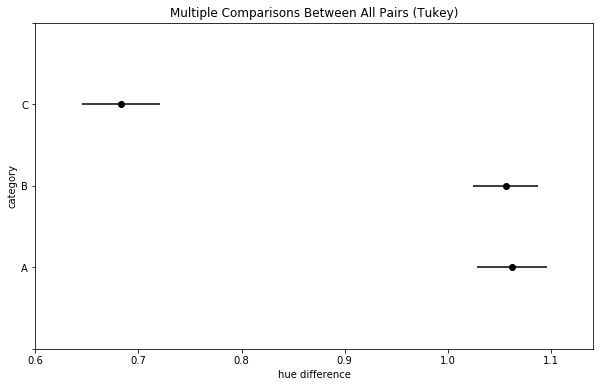

In [351]:
#This function takes the dataframe, the group variable name as a string and the testing variable name as a string

def anova(df,group,testing_var, alpha = 0.05):
    """Fits anova linear model. Returns nothing
    Displays Anova Table, Tukey and Bonferroni Stats"""
    
    formula =testing_var + " ~ " + group
    # fit the model
    lm = ols(formula, data=df).fit()
    #output the anova table
    anova_table = sm.stats.anova_lm(lm)
    display(anova_table)
    
    # Tukey
    mc = statsmodels.stats.multicomp.MultiComparison(df[testing_var],df[group])
    mc_results = mc.tukeyhsd(alpha) # can change the alpha rate here 
    display(mc_results.summary())
    
    fig = mc_results.plot_simultaneous( ylabel= group, xlabel= testing_var + " difference")
    
    # Bonferroni
    comp = statsmodels.stats.multicomp.MultiComparison(df[testing_var],df[group])
    tbl, a1, a2 = comp.allpairtest(stats.ttest_ind,alpha = alpha, method= "bonf")
    display(tbl)
    
    if p > alpha:
        print('Probably the same distribution')
    else:
        print('Probably different distributions')
    return
 
# Example Call
anova(wine,"category","hue", 0.05)

# statsmodels.stats.multicomp.MultiComparison()
